# hh4b-plots integration

**Motivation:** I recently refactored RRevolution such that it does the _entire_ RR selection (including VBF... wooooooo!!!!!)

Since the outputs will look quite similar, I wanted to be able to add functionality to make the plots look v similar using Sean's `hh4b-plots` package.

The goal is ultimately to merge these changes back to master, but for starters I'm going to have a branch `truthDfs`, and _then_ I'll make a MR :)

July 2021

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
os.sys.path.append("../../hh4b/hh4b-plots/")

from hh4b_plots.hh4b_plots import hh4b_plots, get_tree_label
from hh4b_plots.phys_utils import target_to_label

from make_correct_sig_hist import main as correct_sig_hist

%load_ext autoreload
%autoreload 2

Using uproot4


In [3]:
yr='all'
yrs = ['16','17','18']

mcs = ['a','d','e']

sm_ggf_file    = [f'../data/SMNR_pythia_mc16{mc}-MAY21/df_min_dR_RR_sort_VEC.parquet' for mc in mcs]
kL_10_ggf_file = [f'../data/k10_pythia_mc16{mc}-MAY21/df_min_dR_RR_sort_VEC.parquet' for mc in mcs]

k2v_0_vbf_file = [f'../data/vbf_502971_mc16{mc}-MAY21/df_min_dR_RR_sort_VEC.parquet' for mc in mcs]
kL_10_vbf_file = [f'../data/vbf_502978_mc16{mc}-MAY21/df_min_dR_RR_sort_VEC.parquet' for mc in mcs]

VBFflag = ' & ~pass_vbf_sel & (dEta_hh < 1.5)'
target_reg='4b'
Xwt_cut = 1.5

## Step 1: Make the ggF plots

In [4]:
output_dir = '../../diHiggs4b/figures/int_note/evtSel/V2'
NNT_tag='private fw, x-checked MAY21 crypto'

In [6]:
for sig_file, ti, ps in zip([sm_ggf_file, kL_10_ggf_file],
                            ['SM NR','$\kappa_\lambda$ = 10'],
                            ['sm','kL_10']):
    
    for target_reg,color in zip(['4b','3b1l'],['mediumpurple','hh:medturquoise']):

        output_figname = f'X_hh-ggf-{ps}-{target_reg}'

        correct_sig_hist(sig_file, output_dir, output_figname, yr,
                         NNT_tag, target_reg, Xwt_cut, isVBF=False, 
                         color=color,text=f'ggF {ti}')

Making correct + incorrect paired X_hh plot for 4b, Xwt > 1.5
Making correct + incorrect paired X_hh plot for 3b1l, Xwt > 1.5
Making correct + incorrect paired X_hh plot for 4b, Xwt > 1.5
Making correct + incorrect paired X_hh plot for 3b1l, Xwt > 1.5


## Step 2: Make the VBF plots

In [ ]:
target_reg = '4b'
color = 'darkorange'

for sig_file, ti, ps in zip([k2v_0_vbf_file, kL_10_vbf_file],
                            ['$\kappa_{2V}$ = 0','$\kappa_\lambda$ = 10'],
                            ['k2V_0','kL_10']):

    output_figname = f'X_hh-vbf-{ps}-{target_reg}'

    correct_sig_hist(sig_file, output_dir, output_figname, yr,
                     NNT_tag, target_reg, Xwt_cut, isVBF=True, 
                     color=color,text=f'VBF {ti}')

In [30]:
# Reminder old syntax
# plotter.load(data_file, tree, yrs, columns=columns,
#                  withNNweights=withNNweights, isMC=isMC, target_reg=target_reg)

In [35]:
?plotter.set_target

In [38]:
col='X_hh'
columns = [col, 'dEta_hh', 'X_wt_tag', 'correct']

#The meat of the thing: set up an hh4b_plots object
plotter = hh4b_plots()
plotter.load(sm_ggf_file, None, yrs, columns=columns, target_reg=target_reg, isMC=True, withNNweights=False)
plotter.set_target(target_reg=target_reg, extra_sel =f'X_wt_tag > {Xwt_cut}' + VBFflag, yr=yr)


In [40]:
color='mediumpurple'

plotter.set_labels(NNT_tag='private fw, x-checked MAY21 crypto', isggF=True, yr=yr, label_color='k', doRegion=False,
                   target_reg=target_reg)


In [112]:
?plotter.set_labels

Text(1.55, 0.8069231748390024, 'SR: X$_{hh}$ < 1.6')

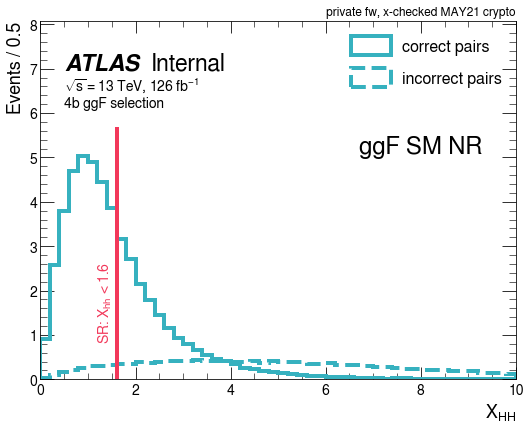

In [61]:
color='hh:medturquoise'

lw=4
bins = np.linspace(0,10,51)

plotter.categorize(cat_dict={'correct':'correct', 'incorrect':'~ correct'})

#Make signal m_hh hist
plotter.correct.target.make_hist1d('X_hh',
                            bins = bins,
                            style_kw = {'ec': color, 'fc' : 'None', 'lw' : lw},
                            showError='',)
#Make signal m_hh hist
plotter.incorrect.target.make_hist1d('X_hh',
                            bins = bins,
                            style_kw = {'ec': color, 'fc' : 'None', 'lw' : lw, 'ls':'--'},
                            showError='',)

#List of hists and labels
hists = [plotter.correct.target.h_X_hh, plotter.incorrect.target.h_X_hh]
labels = ['correct pairs', 'incorrect pairs']

# 1 panel plot
plotter.plot(hists, labels=labels)

# Add a dashed line for our SR defining cut
ax = plotter.ax
ymin, ymax = ax.get_ylim()
ax.plot([1.6]*2,[0,.7*ymax],color='hh:darkpink',lw=lw)

# Set the ylabel
# To do: add a ylabel option to plotter.plot
ax.set_ylabel('Events / 0.5', ha='right', y=1.0, fontsize=18)

ax.text(0.93, 0.65,'ggF SM NR',fontsize=24,ha='right',va='center',transform=ax.transAxes)

ax.text(1.55, 0.1*ymax, 'SR: X$_{hh}$ < 1.6',
        color='hh:darkpink', fontsize=14,
        ha='right',va='bottom',rotation=90)


In [101]:
?plotter.plot

In [56]:
#The meat of the thing: set up an hh4b_plots object
plot_RR = hh4b_plots()
plot_RR.load(['../../hh4b/hh4b-resolved-reconstruction/sm_600463_mc16a.root'], 'fullmassplane', yrs, 
             columns=[col, 'dEta_hh', 'X_wt_tag'], target_reg=target_reg, isMC=True, withNNweights=False)
plot_RR.set_target(target_reg=target_reg, extra_sel =f'X_wt_tag > {Xwt_cut}' + VBFflag, yr=yr)

plot_RR.set_labels(NNT_tag='NNT_tag', isggF=True, yr=yr, label_color='k', doRegion=False)

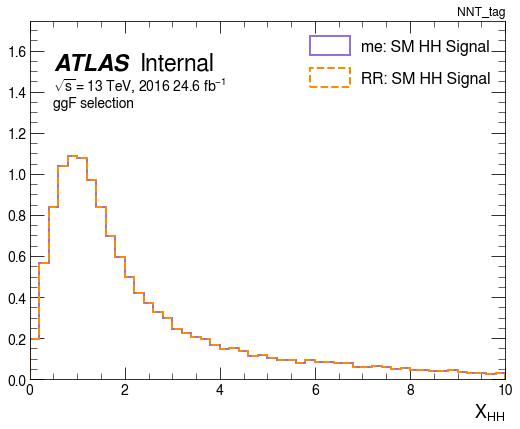

In [68]:
bins = np.linspace(0,10,51)

#Make signal m_hh hist
plotter.target.make_hist1d('X_hh',
                            bins = bins,
                            style_kw = {'ec': color, 'fc' : 'None', 'lw' : 2},
                            showError='',
                            )

plot_RR.target.make_hist1d('X_hh',
                            bins = bins,
                            style_kw = {'ec': 'darkorange', 'fc' : 'None', 'lw' : 2, 'ls':'--'},
                            showError='',
                            )

#List of hists and labels
hists = [plotter.target.h_X_hh, plot_RR.target.h_X_hh]
labels = ['me: SM HH Signal', 'RR: SM HH Signal']

#1 panel plot
plotter.plot(hists, labels=labels)


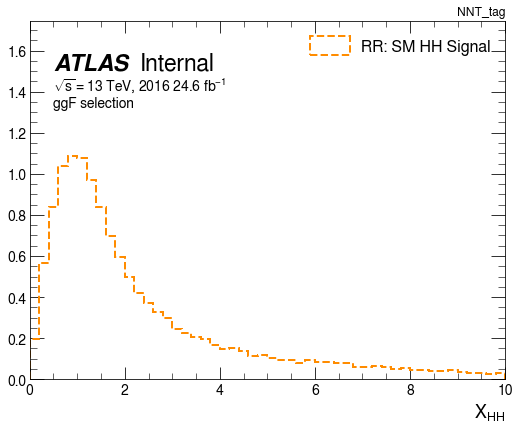

In [62]:
bins = np.linspace(0,10,51)

#Make signal m_hh hist
# plotter.target.make_hist1d('X_hh',
#                             bins = bins,
#                             style_kw = {'ec': color, 'fc' : 'None', 'lw' : 2},
#                             showError='',
#                             )

plot_RR.target.make_hist1d('X_hh',
                            bins = bins,
                            style_kw = {'ec': 'darkorange', 'fc' : 'None', 'lw' : 2, 'ls':'--'},
                            showError='',
                            )

#List of hists and labels
hists = [ plot_RR.target.h_X_hh]
labels = ['RR: SM HH Signal']

#1 panel plot
plotter.plot(hists, labels=labels)



In [64]:
plotter.target.h_X_hh.values

array([ 4.88243737, 13.9050998 , 20.58921029, 25.57446857, 26.79410056,
       26.55631293, 23.81433564, 20.61504185, 17.16408783, 14.69498365,
       12.25797781, 10.34990779,  9.08474359,  8.06363002,  7.3318008 ,
        5.96653765,  5.57833367,  5.04865305,  4.76621009,  4.04823902,
        3.57053604,  3.79526401,  3.3707345 ,  2.8078716 ,  2.89638102,
        2.53848086,  2.27371014,  2.27190752,  1.97400488,  2.33103748,
        2.02836948,  2.09454859,  1.94524437,  1.9559701 ,  1.43547629,
        1.51494555,  1.56845586,  1.43399918,  1.2093806 ,  1.35857651,
        1.07566805,  1.17043022,  1.04986128,  0.97457848,  1.06991555,
        0.90572246,  0.79739435,  0.78861369,  0.60920415,  0.73807532])

In [65]:
plotter.target.h_X_hh.values / plot_RR.target.h_X_hh.values

array([24.60022003, 24.60021999, 24.60021999, 24.60021999, 24.60022   ,
       24.60021997, 24.60022   , 24.60022001, 24.60022004, 24.5861488 ,
       24.61710995, 24.60021999, 24.60021995, 24.60022   , 24.61966995,
       24.57636152, 24.60021999, 24.60021995, 24.60022003, 24.60021999,
       24.60021999, 24.60022004, 24.60021999, 24.60021998, 24.60022006,
       24.60022006, 24.60022003, 24.60021996, 24.60022015, 24.60021992,
       24.60021995, 24.60021998, 24.60022001, 24.60022002, 24.6002201 ,
       24.60021997, 24.60022001, 24.60022002, 24.60021998, 24.60021998,
       24.60021998, 24.60021992, 24.60021996, 24.60022006, 24.60022003,
       24.60022008, 24.60022004, 24.60021997, 24.60021999, 24.60022008])

In [ ]:
plotter.

In [46]:
type(plotter)

Using uproot4


hh4b_plots.hh4b_plots.hh4b_plots

In [22]:
?plotter.loadDf

Using uproot4
